### Pandas x Dictionary

Nós terminamos a aula anterior apresentando um dictionário (dictionary) para vocês.

Há dois tipos de dicionário:
  - Não ordenado
  - Ordenado

In [1]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Dicionário não ordenado

você pode inicializá-lo de duas formas:
  - meu_dic = dict()
  - meu_dic = {}
  
abaixo crio um dictionary com nome 'dic' não confunda com o método 'dict()' que tem um t a mais.

In [2]:
dic = {}
dic['a'] = 0
dic['b'] = 1
dic['c'] = 2

len(dic)

3

In [3]:
dic

{'a': 0, 'b': 1, 'c': 2}

### Outra forma de construir um dicionário

In [5]:
dic = {'a':0, 'b':1, 'c':2}
type(dic), dic

(dict, {'a': 0, 'b': 1, 'c': 2})

### Olhando o conteúdo usando a chave (key)

In [6]:
dic.keys()

dict_keys(['a', 'b', 'c'])

In [7]:
for key in dic.keys():
    print(key)

a
b
c


### Pesquisando 'chave' (key) e 'valor' (dic[key])

In [ ]:
for key in dic.keys():
    print(key, dic[key])

### Usando items() - mais fácil, rápido e seguro

In [9]:
for key, val in dic.items():
    print(key, "->", val)

a -> 0
b -> 1
c -> 2


### Porque um dicionário é tão importante para o Pandas?
### Vamos construir um dicionário mais complexo e tranformá-lo numa tabela Pandas

In [11]:
## 4 animais, a1 ... a4

dic = {}
dic['a1'] = [3.26, 'cm', 'cinza', 223.4, 'g']
dic['a2'] = [4.26, 'cm', 'cinza rajado', 242.3, 'g']
dic['a3'] = [3.76, 'cm', 'cinza', 278.8, 'g']
dic['a4'] = [4.58, 'cm', 'cinza, preto e laranja', 305.1, 'g']
len(dic), dic.keys()

(4, dict_keys(['a1', 'a2', 'a3', 'a4']))

### Veja pandas to_dict()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html  
https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe

In [12]:
df = pd.DataFrame.from_dict(dic)
df

,a1,a2,a3,a4
0,3.26,4.26,3.76,4.58
1,cm,cm,cm,cm
2,cinza,cinza rajado,cinza,"cinza, preto e laranja"
3,223.4,242.3,278.8,305.1
4,g,g,g,g


### Transpondo a tabela (rodando 90 graus)

In [13]:
# matriz ou tabela .T (transpose)
df = pd.DataFrame.from_dict(dic).T
df

,0,1,2,3,4
a1,3.26,cm,cinza,223.4,g
a2,4.26,cm,cinza rajado,242.3,g
a3,3.76,cm,cinza,278.8,g
a4,4.58,cm,"cinza, preto e laranja",305.1,g


### Clocando nomes

In [14]:
df = pd.DataFrame.from_dict(dic).T
df.columns = ['comprimento', 'uni_comp', 'cor', 'peso', 'uni_peso']
df

,comprimento,uni_comp,cor,peso,uni_peso
a1,3.26,cm,cinza,223.4,g
a2,4.26,cm,cinza rajado,242.3,g
a3,3.76,cm,cinza,278.8,g
a4,4.58,cm,"cinza, preto e laranja",305.1,g


### Outra forma de usar dicionário x tabela Pandas

vendo conteúdo do index e de colunas (pd.Series)

In [15]:
# enumerar, listar o indice de uma tabela
# que não é necessariamente numérico: 0, 1, 2 ...
df.index

Index(['a1', 'a2', 'a3', 'a4'], dtype='object')

In [20]:
# lista uma das colunas: Série
df.peso

a1    223.4
a2    242.3
a3    278.8
a4    305.1
Name: peso, dtype: object

In [17]:
type(df.peso)

pandas.core.series.Series

In [21]:
# analisar o tipo do conteúdo
df.peso.iloc[0]

223.4

In [22]:
# analisar o tipo do conteúdo
df.uni_peso.iloc[0]

'g'

In [23]:
type(df.uni_peso.iloc[0])

str

In [24]:
df.uni_peso

a1    g
a2    g
a3    g
a4    g
Name: uni_peso, dtype: object

In [25]:
# coerção para lista
list(df.uni_peso)

['g', 'g', 'g', 'g']

### Ao invés de uma chave por animal
### Vou criar múltiplas chaves por atributo

In [27]:
list(df.cor)

['cinza', 'cinza rajado', 'cinza', 'cinza, preto e laranja']

In [28]:
dic = {}
dic['animal'] = ['a1', 'a2', 'a3', 'a4']
dic['peso'] = [3.26, 4.26, 3.76, 4.48]
dic['uni_comp'] = ['cm', 'cm', 'cm', 'cm']
dic['cor'] = ['cinza', 'cinza rajado', 'cinza', 'cinza, preto e laranja']
dic['peso'] = [223.4, 242.3, 278.8, 305.1]
dic['uni_peso'] = ['g', 'g', 'g', 'g']

dic

{'animal': ['a1', 'a2', 'a3', 'a4'],
 'peso': [223.4, 242.3, 278.8, 305.1],
 'uni_comp': ['cm', 'cm', 'cm', 'cm'],
 'cor': ['cinza', 'cinza rajado', 'cinza', 'cinza, preto e laranja'],
 'uni_peso': ['g', 'g', 'g', 'g']}

In [29]:
df = pd.DataFrame.from_dict(dic)
df
# tabela fica pronta
# indice é numérico
# animal vai para primeira coluna

,animal,peso,uni_comp,cor,uni_peso
0,a1,223.4,cm,cinza,g
1,a2,242.3,cm,cinza rajado,g
2,a3,278.8,cm,cinza,g
3,a4,305.1,cm,"cinza, preto e laranja",g


### Peso médio, desvio padrão amostral, mediana

o Pandas utiliza numpy
objeto numpy  <objeto>.mean() ... <objeto>.median() 
    
significa: se a série e numérica/float então .mean(), .std(), .median(), .max(), .min()

In [37]:
df.peso.mean()

262.4

In [31]:
df.peso.std()

36.59353312631437

In [36]:
# muitas vezes, não quero ver uma enormidade de casas decimais
# numero de casas decimais = precisão do teu instrumento
# peso: uma casa decimal

np.round(df.peso.std(), 1)

36.6

In [32]:
df.peso.median()

260.55

In [38]:
np.round(df.peso.median(), 1)

260.6

In [33]:
df.peso.max()

305.1

In [34]:
df.peso.min()

223.4

In [35]:
df

,animal,peso,uni_comp,cor,uni_peso
0,a1,223.4,cm,cinza,g
1,a2,242.3,cm,cinza rajado,g
2,a3,278.8,cm,cinza,g
3,a4,305.1,cm,"cinza, preto e laranja",g


### Desafio:
  - o que é:
        - Média?
        - Mediana?
        - Moda?
        - Desvio padrão amostral?
        - Desvio padrão populacional?
        - O que vocês entendem por erro na tomada de uma medida.
           - não existe medida absoluta
           - qq medida em ciência tem um <valor central> + <erro>

In [43]:
# - len(df) = numero de linhas da tabela = df.shape[0]

# %.1
# %nn.mm
# nn = inteiros, pode ficar vazio
# mm = número de decimais

"O peso médio das %d cobras é %.1f g (%.1f)"%(len(df), df.peso.mean(), df.peso.std())

'O peso médio das 4 cobras é 262.4 g (36.6)'

In [39]:
df.shape

(4, 5)

### Criando cobras com peso e comprimento ~ N(mu,std) = distribuição normal

In [44]:
# gerador de numerors inteiros ...
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [46]:
# arange(ini, end, step)
np.arange(100, 1000, 50)

array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])

### numpy random --> máquina randômica, pseudo-estocástica

In [47]:
dic = {}
N = 30

dic['id'] = np.arange(0, N)
#             np.random.normal(mu, std, size)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)

df = pd.DataFrame.from_dict(dic)
df.head(5)

,id,peso,comprimento
0,0,6.235564,1.608241
1,1,4.859109,1.659999
2,2,5.295964,1.973795
3,3,4.838303,1.097397
4,4,5.462231,1.702194


### N cresce .... posso dizer que a média amostral se aproxima da populacional

### Exemplo espectômetro de massas:
  - bilhões de céulas
  - amostra de 5 K células (ótimo)
     - medir proteínas
     - se a média de Actina se aproxima da média da pele do individuo
        - ???

### Os números abaixo estão corretos?

In [50]:
"O peso médio das %d cobras é %.1f (%.1f) Kg"%(len(df), df.peso.mean(), df.peso.std())

'O peso médio das 30 cobras é 5.1 (0.5) Kg'

In [51]:
"O comprimento médio das %d cobras é %.2f (%.2f) m"%(len(df), df.comprimento.mean(), df.comprimento.std())

'O comprimento médio das 30 cobras é 1.84 (0.41) m'

### Não dá para responder esta pergunta agora
  - Vamos estudar teste de hipótese
  - Estudar distribuição Normal, Z, t-student
  - Estudar intervalo de confiança --> [inf, sup], vide um alpha=confiança(95%)

### N=30 aproximando da normalidade (distribuição normal)

(array([1., 1., 2., 1., 5., 5., 5., 7., 2., 1.]),
 array([0.76634935, 0.95192179, 1.13749424, 1.32306668, 1.50863913,
        1.69421157, 1.87978402, 2.06535646, 2.25092891, 2.43650135,
        2.6220738 ]),
 <BarContainer object of 10 artists>)

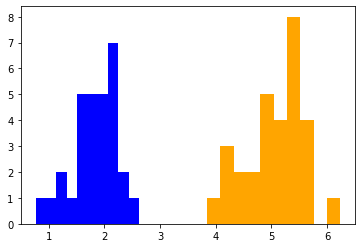

In [53]:
# métodos histograma do matplotlib
plt.hist(df.peso, color='orange')
plt.hist(df.comprimento, color='blue')

### Aumentando N ... faça simulações

  - ao aumentar o N melhoro 
    - a precisão do valor central (teorema)
    - simetria da distriuição
    - tender a uma distribuição Normal (média = moda = mediana)
  - valor central = média = valor esperado
  - peso --> valor esperado do peso = \<peso>

(array([ 1.,  1.,  6.,  5., 13., 15., 27., 21., 32., 20., 26., 17.,  8.,
         6.,  2.]),
 array([0.8477685 , 0.99220974, 1.13665099, 1.28109224, 1.42553349,
        1.56997473, 1.71441598, 1.85885723, 2.00329847, 2.14773972,
        2.29218097, 2.43662222, 2.58106346, 2.72550471, 2.86994596,
        3.0143872 ]),
 <BarContainer object of 15 artists>)

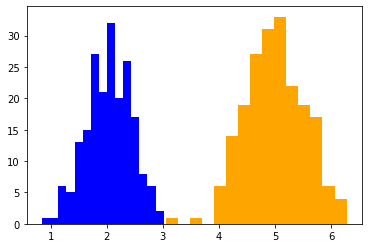

In [54]:
dic = {}
N = 200

dic['id'] = np.arange(0, N)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)

df = pd.DataFrame.from_dict(dic)

# o que são bins??
plt.hist(df.peso, bins=15, color='orange')
plt.hist(df.comprimento, bins=15, color='blue')

### Como monta o histograma?
  - série de valores (peso, comprimento)
  - para cada faixa valores, conto qtos individuos (N = 200)
  - define qtos bins - os segmentos de valores do eixo x:
    - bins = 10
    - val min = 1
    - val max = 3.5
    - (3.5 - 1) / 10 = 0.25
  - historgrama: gráfico de valores discreto --> tender ao contínuo

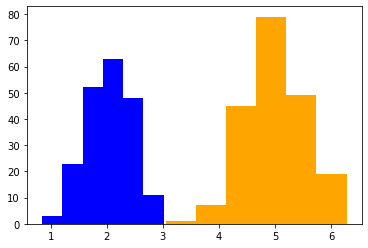

In [55]:
plt.hist(df.peso, bins=6, color='orange');
plt.hist(df.comprimento, bins=6, color='blue');

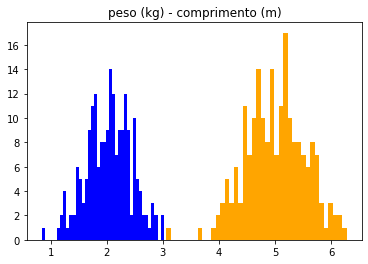

In [56]:
plt.hist(df.peso, bins=40, color='orange')
plt.hist(df.comprimento, bins=40, color='blue')
plt.title("peso (kg) - comprimento (m)");

### Na aula de gráficos veremos como criar vários frames (quadros)

### E aí? Os número 'bateram'? Algo a comentar?
  - Se sim, porquê?
  - Se não, porquê?
  
  - De acordo com que o N aumenta tenho mais confiança que os valores esperados amostrais estão próximos dos valores esperados populacionais.

### Filtrando dados

quais são os indivíduos que estão acima da média + 2 desvios padrões para mais e para menos

In [57]:
len(df)

200

In [58]:
# resposta é uma série lógica (Falses, Trues)
df.peso > df.peso.mean() + 2*df.peso.std()

0      False
1      False
2      False
3      False
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: peso, Length: 200, dtype: bool

In [59]:
# se eu somar (True = 1, False = 0)
#    a soma = ao individuos acima de 2 desvio padrões amostrais
#    desvio amostral máximo à direita -- > 2 SSD
np.sum(df.peso > df.peso.mean() + 2*df.peso.std())

3

### Você esperava o valor 3?
  - quanto esperava: Daniel esperva 10 (representa 5% à esq. e 5% direita)
  - segundo Ronald Fisher (pais da estatística e genética moderna > 1930)
    - valores extremos são 2.5% à esquerda da distr.normal ou 2.5 à direita
    - N = 200 -- N * 2.5/100 = 5

### Quem são os indivíduos?

In [62]:
# retorna os Trues
print("peso tem que estar acima", np.round(df.peso.mean() + 2*df.peso.std(), 1))
df[df.peso > df.peso.mean() + 2*df.peso.std()]

peso tem que estar acima 6.1


,id,peso,comprimento
4,4,6.278208,2.501652
52,52,6.184684,1.894896
103,103,6.168930,2.226667


### Vamos melhorar

In [63]:
mu  = df.peso.mean()
# sample standard deviation
ssd = df.peso.std()

limite_sup = mu + 2*ssd
limite_inf = mu - 2*ssd

"A média é %.1f (ssd=%.1f), e os limites são [%.1f, %.1f]"%(mu, ssd, limite_inf, limite_sup)

'A média é 5.0 (ssd=0.5), e os limites são [3.9, 6.1]'

### Dentro do esperado?
  - resposta são os testes de hipótese, e o intervalor de confiança
  - mas, parece que tudo corre muito bem com N = 200

### Filtrar acima e abaixo da média (Pandas usa notação diferente!)
  - trabalha com uma lógica de True e False
  - bitwise os operadores não são 'and' e 'or'
  - bitwise operator: & (e comercial == and) ou | (pipe == or)

In [64]:
## errado!!!

# parêntese (chato que o Python detesta) é obrigatório no Pandas
df[ df.peso > limite_sup & df.peso < limite_inf]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [65]:
# Está errado? qual o erro
# and = & - and bitwise, notação binária 

# parêntese (chato que o Python detesta) é obrigatório no Pandas
df[(df.peso > limite_sup) & (df.peso < limite_inf)]

,id,peso,comprimento


### Tinha que dar vazio, certo? Porque?

In [66]:
### or = | - or bitwise, notação binária 

df[(df.peso > limite_sup) | (df.peso < limite_inf)]

,id,peso,comprimento
4,4,6.278208,2.501652
52,52,6.184684,1.894896
80,80,3.059127,1.533164
103,103,6.168930,2.226667
107,107,3.678067,2.305271
155,155,3.919578,2.633489


### Animais grandes: apenas 1 desvio padrão

In [67]:
lim_peso_sup =  df.peso.mean() + df.peso.std()
lim_comp_sup =  df.comprimento.mean() + df.comprimento.std()

# aqui uso & (and)
df[(df.peso >= lim_peso_sup) & (df.comprimento >= lim_comp_sup)]

,id,peso,comprimento
4,4,6.278208,2.501652
11,11,5.563106,2.522264


### Animais pequenos: apenas 1 desvio padrão

In [68]:
lim_peso_inf =  df.peso.mean() - df.peso.std()
lim_comp_inf =  df.comprimento.mean() - df.comprimento.std()

print(np.round(lim_peso_inf,2), 'kg ....', np.round(lim_comp_inf,2), 'm')

# aqui uso & (and)
df[(df.peso <= lim_peso_inf) & (df.comprimento <= lim_comp_inf)]

4.48 kg .... 1.64 m


,id,peso,comprimento
17,17,4.438064,1.471893
20,20,4.335947,1.633704
80,80,3.059127,1.533164
192,192,4.299892,1.405234


In [70]:
df[(df.peso < lim_peso_inf)]

,id,peso,comprimento
9,9,4.439274,1.766607
14,14,4.010517,1.948318
17,17,4.438064,1.471893
20,20,4.335947,1.633704
39,39,4.369657,2.863025
60,60,4.441423,2.219874
73,73,4.147704,2.800307
75,75,4.315035,1.849951
76,76,4.173846,1.857114
78,78,4.240746,2.087186


In [71]:
df[(df.comprimento <= lim_comp_inf)]

,id,peso,comprimento
2,2,5.542096,1.502498
16,16,4.756304,1.628238
17,17,4.438064,1.471893
20,20,4.335947,1.633704
21,21,4.814952,1.123487
28,28,4.964366,0.847768
36,36,5.097253,1.317692
44,44,5.076282,1.598993
47,47,5.316383,1.489853
48,48,4.780086,1.349786


### A maquina randômica não criou animais super pequenos ou super grandes. Porque?

### O que é uma máquina randômica? estocástica == gera números não previsíveis

### Como você pode mostrar que é uma máquina randômica?

In [96]:
# baixei de 200 para 30 individuos
# achar 2*SSD para mais ou para menos x duas medidas (peso e comprimento)
# N = 30 já começa ser dificil

# algoritmo estocástico
N = 30  # fixo sempre 30 individuos
i = 0   # contador de loop (laço while)

while(True):  # rode para todo sempre, nunca vai parar
    i += 1
    
    dic = {}

    dic['id'] = np.arange(0, N)
    dic['peso'] = np.random.normal(5, .5, N)
    dic['comprimento'] = np.random.normal(2, .4, N)

    df = pd.DataFrame.from_dict(dic)
    
    mu_peso  = df.peso.mean()
    ssd_peso = df.peso.std()
    
    mu_comp  = df.comprimento.mean()
    ssd_comp = df.comprimento.std()
    
    lim_peso_sup = mu_peso + 2*ssd_peso
    lim_comp_sup = mu_comp + 2*ssd_comp

   
    df = df[(df.peso > lim_peso_sup) & (df.comprimento > lim_comp_sup)]
    
    # uma condição de break - cair fora
    # se dentro do loop achar ao menos 1 individuo, pare a máquina estocástica
    if len(df) > 0: 
        print("%d) <peso> = %.1f (%.1f),  <comp> = %.1f (%.1f), peso sup = %.1f kg, comp sup = %.1f m"%(i, 
               mu_peso, ssd_peso, mu_comp, ssd_comp, lim_peso_sup, lim_comp_sup) )
        break
        
df         

52) <peso> = 5.0 (0.5),  <comp> = 2.0 (0.4), peso sup = 5.9 kg, comp sup = 2.8 m


,id,peso,comprimento
11,11,6.093218,2.848444


### Qual o erro de peformance no meu algoritmo?

### Isto np.random.normal() é uma máquina estocástica? gerador de números numa distribuição normal?

### O que significa que consegui um valor após 150 tentativas?

In [97]:
100/150

0.6666666666666666

In [98]:
np.sqrt(100/150)

0.816496580927726

### 8% de chance de um fenomeno grande (ou pequeno ocorrer)

In [101]:
0.816*0.816

0.6658559999999999

In [103]:
100./(0.665*0.665)

226.12923285657752

### p(raro) * p(raro) = p(raro) ^ 2
### 6.24% * 6.24% ~ 0.39% de dois fenômecnos ocorrerem

### Por isto que Ronald Fischer escolheu 5% como corte "do raro"?

https://en.wikipedia.org/wiki/P-value

https://en.wikipedia.org/wiki/Ronald_Fisher


### Markdown command: >> \![Ronald Fisher]\(../figure/ronald_fisher.jpg)

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

![Ronald Fisher](../figure/ronald_fisher.jpg)

In [104]:
os.listdir("../figure")

['ronald_fisher.jpg',
 'carro_rendimento_por_cilindro.png',
 'meucarro.png',
 'carro_rendimento_por_cilindro_better_font.png']

### Localizando linhas e colunas

In [105]:
N = 20
dic = {}

dic['id'] = np.arange(0, N)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)
dic['comp_cabeca'] = np.random.normal(.4, .02, N)

df = pd.DataFrame.from_dict(dic)

df.head()

,id,peso,comprimento,comp_cabeca
0,0,6.099251,2.121399,0.401525
1,1,4.716048,1.955578,0.374107
2,2,5.119006,2.082334,0.380967
3,3,5.607733,2.196071,0.426562
4,4,5.983731,1.764746,0.402562


### Filtrando linhas 1,3 e 5 com df.iloc[ ]

In [106]:
df.iloc[[1,3,5]]

,id,peso,comprimento,comp_cabeca
1,1,4.716048,1.955578,0.374107
3,3,5.607733,2.196071,0.426562
5,5,6.032591,1.947818,0.377442


### Colunas

In [107]:
df.columns

Index(['id', 'peso', 'comprimento', 'comp_cabeca'], dtype='object')

### Selecionando colunas

In [108]:
df[ ['peso', 'comprimento'] ].head(3)

,peso,comprimento
0,6.099251,2.121399
1,4.716048,1.955578
2,5.119006,2.082334


### Selecionando as mesmas colunas 1 e 2 com df.iloc[ ]

os ':' selecionam todas as linhas\!   
mas, o head(3) filtra as primeiras 3 linhas  

In [111]:
df.iloc[:, 1:3].head(3)

,peso,comprimento
0,6.099251,2.121399
1,4.716048,1.955578
2,5.119006,2.082334


### Com df.loc não precisa do parênteses interno

Access a group of rows and columns by label(s) or a boolean array.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [114]:
df.iloc[2:4]

,id,peso,comprimento,comp_cabeca
2,2,5.119006,2.082334,0.380967
3,3,5.607733,2.196071,0.426562


In [115]:
df.loc[2:4]

,id,peso,comprimento,comp_cabeca
2,2,5.119006,2.082334,0.380967
3,3,5.607733,2.196071,0.426562
4,4,5.983731,1.764746,0.402562


In [117]:
df.loc[1:3, ['peso', 'comprimento']]

,peso,comprimento
1,4.716048,1.955578
2,5.119006,2.082334
3,5.607733,2.196071


In [119]:
df.loc[[1,2,5], ['peso', 'comp_cabeca']]

,peso,comp_cabeca
1,4.716048,0.374107
2,5.119006,0.380967
5,6.032591,0.377442


### Index

In [140]:
N = 5
dic = {}

dic['id'] = np.arange(0, N)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)
dic['comp_cabeca'] = np.random.normal(.4, .02, N)

df = pd.DataFrame.from_dict(dic)
df

,id,peso,comprimento,comp_cabeca
0,0,5.266469,2.532866,0.422576
1,1,5.612474,2.572674,0.389211
2,2,4.813654,2.187768,0.376611
3,3,4.727105,2.638261,0.363889
4,4,4.781037,2.324500,0.403988


### Criar duas cópias de 'df'
  - df_fake = df
  - df2     = df.copy()

In [141]:
## muito cuidado com o Pyton:  a = b (a e b apontam para o mesmo endereço)
df_fake = df

## para criar uma variável nova, usa-se copy()
df2     = df.copy()

### São objetos diferentes?

método id() --> endereço do objeto  
logo, se o endereço (de memória), é o mesmo objeto

In [142]:
id(df), id(df_fake), id(df) != id(df_fake)

(139897879164176, 139897879164176, False)

In [143]:
id(df), id(df2), id(df) != id(df2)

(139897879164176, 139897879134032, True)

In [147]:
df

,id,peso,comprimento,comp_cabeca
0,0,5.266469,2.532866,0.422576
1,1,5.612474,2.572674,0.389211
2,2,4.813654,2.187768,0.376611
3,3,4.727105,2.638261,0.363889
4,4,4.781037,2.324500,0.403988


In [145]:
df == df_fake

,id,peso,comprimento,comp_cabeca
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


In [149]:
df.iloc[0,1] = np.round(df.iloc[0,1], 1)
df.iloc[0,1]

5.3

In [150]:
df

,id,peso,comprimento,comp_cabeca
0,0,5.300000,2.532866,0.422576
1,1,5.612474,2.572674,0.389211
2,2,4.813654,2.187768,0.376611
3,3,4.727105,2.638261,0.363889
4,4,4.781037,2.324500,0.403988


In [151]:
df == df_fake

,id,peso,comprimento,comp_cabeca
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


### Dando nome para cada linha (índice, index)

In [124]:
df.index = ['Indian cobra', 'Coral', 'False coral', 'Bothrops jararaca', 'Bothrops terrificus']
df

,id,peso,comprimento,comp_cabeca
Indian cobra,0,5.018487,2.077225,0.385134
Coral,1,5.402775,1.461468,0.392579
False coral,2,5.948463,1.749359,0.398569
Bothrops jararaca,3,4.566635,1.917101,0.408035
Bothrops terrificus,4,4.687097,1.413495,0.417472


### Copiando uma tabela, para usar mais para frente

In [126]:
df2 = df.copy()

### Comparando dataframes = comparando matrizes (np.arrays)

In [130]:
df2 <= df

,id,peso,comprimento,comp_cabeca
Indian cobra,True,True,True,True
Coral,True,True,True,True
False coral,True,True,True,True
Bothrops jararaca,True,True,True,True
Bothrops terrificus,True,True,True,True


### Usando loc nos índices

In [131]:
df.loc[['Coral', 'False coral']]

,id,peso,comprimento,comp_cabeca
Coral,1,5.402775,1.461468,0.392579
False coral,2,5.948463,1.749359,0.398569


In [132]:
df.loc[[True, False, False, True, True]]

,id,peso,comprimento,comp_cabeca
Indian cobra,0,5.018487,2.077225,0.385134
Bothrops jararaca,3,4.566635,1.917101,0.408035
Bothrops terrificus,4,4.687097,1.413495,0.417472


### Pode usar lógicas via comprehension que é muito rápido
  - quero todas as cobras não "coral"

In [133]:
not_coral = [x for x in df.index if 'coral' not in x.lower()]
not_coral

['Indian cobra', 'Bothrops jararaca', 'Bothrops terrificus']

In [134]:
df.loc[not_coral]

,id,peso,comprimento,comp_cabeca
Indian cobra,0,5.018487,2.077225,0.385134
Bothrops jararaca,3,4.566635,1.917101,0.408035
Bothrops terrificus,4,4.687097,1.413495,0.417472


### Como exercício, liste somente as espécies que tiver 'coral'

### Resetando índices (index)

  - o índice tem nome de cobras
  - preciso retirar este indice e voltar para numérico
  - os nomes das espécies tem que ir para uma coluna

In [135]:
df = df.reset_index()
df

,index,id,peso,comprimento,comp_cabeca
0,Indian cobra,0,5.018487,2.077225,0.385134
1,Coral,1,5.402775,1.461468,0.392579
2,False coral,2,5.948463,1.749359,0.398569
3,Bothrops jararaca,3,4.566635,1.917101,0.408035
4,Bothrops terrificus,4,4.687097,1.413495,0.417472


### Voltando os dados originais

In [136]:
df2

,id,peso,comprimento,comp_cabeca
Indian cobra,0,5.018487,2.077225,0.385134
Coral,1,5.402775,1.461468,0.392579
False coral,2,5.948463,1.749359,0.398569
Bothrops jararaca,3,4.566635,1.917101,0.408035
Bothrops terrificus,4,4.687097,1.413495,0.417472


In [137]:
df = df2.copy()
df = df.reset_index().rename(columns={'index': 'especie'})
df

,especie,id,peso,comprimento,comp_cabeca
0,Indian cobra,0,5.018487,2.077225,0.385134
1,Coral,1,5.402775,1.461468,0.392579
2,False coral,2,5.948463,1.749359,0.398569
3,Bothrops jararaca,3,4.566635,1.917101,0.408035
4,Bothrops terrificus,4,4.687097,1.413495,0.417472


In [139]:
df = df2.copy()
cols = df.columns
df = df.reset_index()
df.columns  = ['especie'] + list(cols)
df

,especie,id,peso,comprimento,comp_cabeca
0,Indian cobra,0,5.018487,2.077225,0.385134
1,Coral,1,5.402775,1.461468,0.392579
2,False coral,2,5.948463,1.749359,0.398569
3,Bothrops jararaca,3,4.566635,1.917101,0.408035
4,Bothrops terrificus,4,4.687097,1.413495,0.417472


### Inplace = change are permanent

In [ ]:
df = df2.copy()
df.reset_index().rename(columns={'index': 'cobra'}, inplace=True)
df

In [ ]:
type(df)

In [ ]:
df.shape

In [ ]:
nrow, ncol = df.shape
nrow, ncol